# Convolutional neural network

## Parameters

In [46]:


import torch

sobel_filter = torch.tensor([
    [1.0, 0, -1.0],
    [2.0, 0, -2.0],
    [1.0, 0.0, -1.0]
])

bias = 0.0

## Random image (9, 9)

with each value within the range of 0-1

In [47]:
input_order = 9
image = torch.rand(1, 1, input_order, input_order)

print(image)

tensor([[[[0.9100, 0.1599, 0.3450, 0.7153, 0.6602, 0.3503, 0.1530, 0.7589,
           0.2584],
          [0.8565, 0.1716, 0.1364, 0.3096, 0.4789, 0.1390, 0.7532, 0.3873,
           0.0837],
          [0.6374, 0.3136, 0.4849, 0.6897, 0.0704, 0.3360, 0.0376, 0.7340,
           0.7200],
          [0.6159, 0.5066, 0.5299, 0.5502, 0.0491, 0.4624, 0.9555, 0.9223,
           0.2588],
          [0.2986, 0.5631, 0.7777, 0.3276, 0.0375, 0.7687, 0.4916, 0.4330,
           0.1792],
          [0.5735, 0.9610, 0.7645, 0.2127, 0.6128, 0.7501, 0.3468, 0.5848,
           0.0551],
          [0.6637, 0.8504, 0.1768, 0.8323, 0.8207, 0.7938, 0.2986, 0.5804,
           0.4603],
          [0.8498, 0.8366, 0.8099, 0.2530, 0.8442, 0.5123, 0.0446, 0.4282,
           0.0225],
          [0.0295, 0.0244, 0.8430, 0.2850, 0.1613, 0.0665, 0.9417, 0.1697,
           0.5534]]]])


## Task 1

### Convolution with the default parameters

The result has the dimension:
$$n_{new}={n-f}+1$$

- **n** - order of the input tensor
- **f** - order of the filter

In [48]:
import torch.nn as nn

cnn = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
cnn.state_dict()["weight"][0][0] = sobel_filter
cnn.state_dict()["bias"][0] = bias

z = cnn(image)
print(z)

tensor([[[[ 2.1576e+00, -1.2074e+00, -5.8561e-01,  1.0597e+00, -8.5622e-03,
           -1.3032e+00,  5.5115e-01],
          [ 1.1109e+00, -9.3378e-01,  9.6757e-01,  9.6556e-01, -1.1153e+00,
           -1.5041e+00,  1.5159e-03],
          [-1.5475e-01, -2.2777e-01,  2.1165e+00,  8.8048e-02, -2.2343e+00,
           -9.8194e-01,  1.0235e+00],
          [-1.0632e+00,  1.1757e+00,  2.1130e+00, -1.3318e+00, -1.5485e+00,
            3.7695e-01,  1.6132e+00],
          [-3.7414e-01,  1.7502e+00,  3.9964e-01, -1.4774e+00,  6.0014e-01,
            8.7980e-01,  7.3411e-01],
          [ 8.2285e-01,  1.3681e+00, -1.1705e+00, -7.1955e-01,  2.1098e+00,
            6.7622e-01, -9.5998e-03],
          [-2.4663e-01,  9.2468e-01, -3.0859e-02, -2.6148e-01,  1.3408e+00,
            2.7843e-01,  2.7073e-01]]]], grad_fn=<ConvolutionBackward0>)


### Convolution with the stride=2

stride=2 leads to:
- horizontal move - move 2 values right each time
- vertical mode - move 2 values down after finishing row

The result has the dimension:
$$n_{new}=\dfrac{n-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride

In [49]:
cnn_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
cnn_stride2.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2.state_dict()["bias"][0] = 0.0

z_stride2 = cnn_stride2(image)
print(z_stride2)

tensor([[[[ 2.1576, -0.5856, -0.0086,  0.5511],
          [-0.1547,  2.1165, -2.2343,  1.0235],
          [-0.3741,  0.3996,  0.6001,  0.7341],
          [-0.2466, -0.0309,  1.3408,  0.2707]]]],
       grad_fn=<ConvolutionBackward0>)


### Convolution with the stride=2 and padding=1

The result has the dimension:
$$n_{new}=\dfrac{n+2p-f}{s}+1$$

- _n_ - order of the input tensor
- _f_ - order of the filter
- _s_ - stride
- _p_ - padding

In [50]:
cnn_stride2_padding1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
cnn_stride2_padding1.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding1.state_dict()["bias"][0] = 0.0

z_stride2_padding1 = cnn_stride2_padding1(image)
print(z_stride2_padding1)

tensor([[[[-0.4914, -1.2487,  0.9005, -1.0655,  1.9051],
          [-1.3053, -0.9338,  0.9656, -1.5041,  2.7776],
          [-2.5938,  1.1757, -1.3318,  0.3769,  2.3730],
          [-3.4984,  1.3681, -0.7196,  0.6762,  2.1737],
          [-0.8854,  0.0624,  0.1777, -0.1222,  0.7675]]]],
       grad_fn=<ConvolutionBackward0>)


## Task 2

### Convolution with the stride=2 and padding=same

To get the same input and output dimension:
$$n=\dfrac{n+2p-f}{s}+1$$

$$p = \frac{ns - n + f - s}{2}$$

For _n=9_, _s=2_ and _f=3_:
$$p = \frac{9*2-9+3-2}{2}=5$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [51]:
import math

n = 9
f = 3
s = 2
padding_same_stride2 = (n * s - n + f - s) / 2
padding_same_stride2 = math.ceil(padding_same_stride2)  # round up if fractional

cnn_stride2_padding_same = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=f,
    stride=s,
    padding=padding_same_stride2
)
cnn_stride2_padding_same.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding_same.state_dict()["bias"][0] = 0.0

z_stride2_padding_same = cnn_stride2_padding_same(image)
print(z_stride2_padding_same)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.4914, -1.2487,  0.9005, -1.0655,  1.9051,
            0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.3053, -0.9338,  0.9656, -1.5041,  2.7776,
            0.0000,  0.0000],
          [ 0.0000,  0.0000, -2.5938,  1.1757, -1.3318,  0.3769,  2.3730,
            0.0000,  0.0000],
          [ 0.0000,  0.0000, -3.4984,  1.3681, -0.7196,  0.6762,  2.1737,
            0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.8854,  0.0624,  0.1777, -0.1222,  0.7675,
            0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000]]]], grad_fn=<ConvolutionBackward0>)


## Bonus

### Padding visualization


In [52]:
import torch.nn.functional as F

padded_image = F.pad(image, (1, 1, 1, 1))  # (left, right, top, bottom)
print(padded_image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000],
          [0.0000, 0.9100, 0.1599, 0.3450, 0.7153, 0.6602, 0.3503, 0.1530,
           0.7589, 0.2584, 0.0000],
          [0.0000, 0.8565, 0.1716, 0.1364, 0.3096, 0.4789, 0.1390, 0.7532,
           0.3873, 0.0837, 0.0000],
          [0.0000, 0.6374, 0.3136, 0.4849, 0.6897, 0.0704, 0.3360, 0.0376,
           0.7340, 0.7200, 0.0000],
          [0.0000, 0.6159, 0.5066, 0.5299, 0.5502, 0.0491, 0.4624, 0.9555,
           0.9223, 0.2588, 0.0000],
          [0.0000, 0.2986, 0.5631, 0.7777, 0.3276, 0.0375, 0.7687, 0.4916,
           0.4330, 0.1792, 0.0000],
          [0.0000, 0.5735, 0.9610, 0.7645, 0.2127, 0.6128, 0.7501, 0.3468,
           0.5848, 0.0551, 0.0000],
          [0.0000, 0.6637, 0.8504, 0.1768, 0.8323, 0.8207, 0.7938, 0.2986,
           0.5804, 0.4603, 0.0000],
          [0.0000, 0.8498, 0.8366, 0.8099, 0.2530, 0.8442, 0.5123, 0.0446,
           0.4282, 0.0225, 0.0000],
 

### Comparative visualization

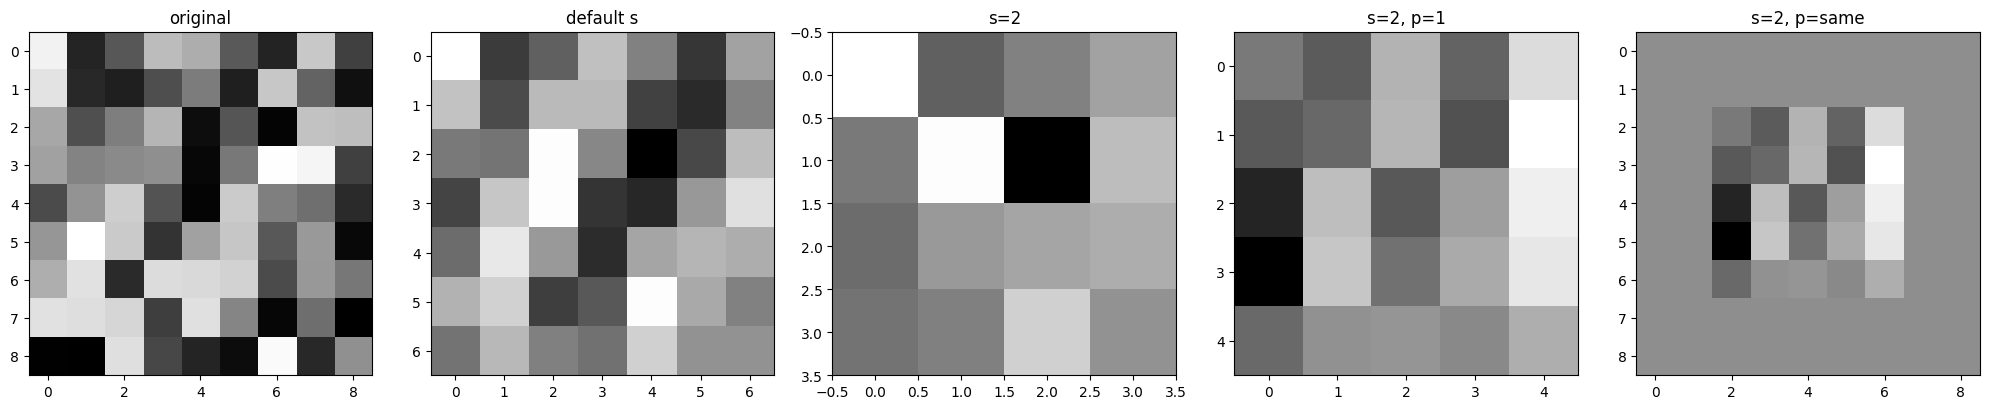

In [53]:
from matplotlib import pyplot as plt

images = [image, z, z_stride2, z_stride2_padding1, z_stride2_padding_same]
labels = ["original", "default s", "s=2", "s=2, p=1", "s=2, p=same"]

n = len(images)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

for ax, i, l in zip(axes, images, labels):
    img_np = i.squeeze().detach().numpy()
    ax.imshow(img_np, cmap="gray")
    ax.set_title(l)

plt.tight_layout()
plt.show()